# Load libraries

In [ ]:
!pip install -Uqq fastbook

In [1]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

# Set up data

In [131]:
# aaf_url = 'https://www.dropbox.com/s/a0lj1ddd54ns8qy/All-Age-Faces%20Dataset.zip'
# !wget $aaf_url -P 'data'

In [132]:
# import zipfile
# with zipfile.ZipFile('data/All-Age-Faces Dataset.zip', 'r') as zip_ref:
#     zip_ref.extractall('data/aaf/')

In [133]:
fnames = get_image_files('data/aaf/All-Age-Faces Dataset/aglined faces')

In [134]:
dblock = DataBlock()

In [135]:
dsets = dblock.datasets(fnames)

In [3]:
def label_func(fname):
    return int(fname.name[-6:-4])

In [137]:
dblock = DataBlock( blocks = (ImageBlock, RegressionBlock), 
                    get_items = get_image_files,
                    get_y     = label_func,
                    splitter  = RandomSplitter(),
                    item_tfms = Resize(224))

dsets = dblock.datasets('data/aaf/All-Age-Faces Dataset/aglined faces')
dsets.train[0]

(PILImage mode=RGB size=301x371, tensor(24.))

In [138]:
dls = dblock.dataloaders(Path('data/aaf/All-Age-Faces Dataset/aglined faces'))

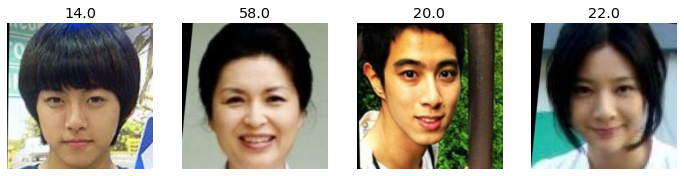

In [139]:
dls.valid.show_batch(max_n=4, nrows=1)

In [140]:
learn = cnn_learner(dls, resnet34, metrics=rmse)

In [141]:
learn.fine_tune(4)
learn.export()

epoch,train_loss,valid_loss,_rmse,time
0,1033.873413,626.019043,25.020370,02:36


epoch,train_loss,valid_loss,_rmse,time
0,328.631073,179.288528,13.389867,03:38
1,116.017525,80.860275,8.992233,03:39
2,81.307152,65.590607,8.098804,03:39
3,61.790997,61.855381,7.864820,03:40


# Inference

In [4]:
learn_inf = load_learner('export.pkl')

In [5]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [220]:
# btn_upload = SimpleNamespace(data = ['simu_liu.jpg'])

In [7]:
btn_upload.data

[b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe2\x02@ICC_PROFILE\x00\x01\x01\x00\x00\x020ADBE\x02\x10\x00\x00mntrRGB XYZ \x07\xcf\x00\x06\x00\x03\x00\x00\x00\x00\x00\x00acspAPPL\x00\x00\x00\x00none\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-ADBE\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\ncprt\x00\x00\x00\xfc\x00\x00\x002desc\x00\x00\x010\x00\x00\x00kwtpt\x00\x00\x01\x9c\x00\x00\x00\x14bkpt\x00\x00\x01\xb0\x00\x00\x00\x14rTRC\x00\x00\x01\xc4\x00\x00\x00\x0egTRC\x00\x00\x01\xd4\x00\x00\x00\x0ebTRC\x00\x00\x01\xe4\x00\x00\x00\x0erXYZ\x00\x00\x01\xf4\x00\x00\x00\x14gXYZ\x00\x00\x02\x08\x00\x00\x00\x14bXYZ\x00\x00\x02\x1c\x00\x00\x00\x14text\x00\x00\x00\x00Copyright 1999 Adobe Systems Incorporated\x00\x00\x00desc\x00\x00\x00\x00\x00\x00\x00\x11Adobe RGB

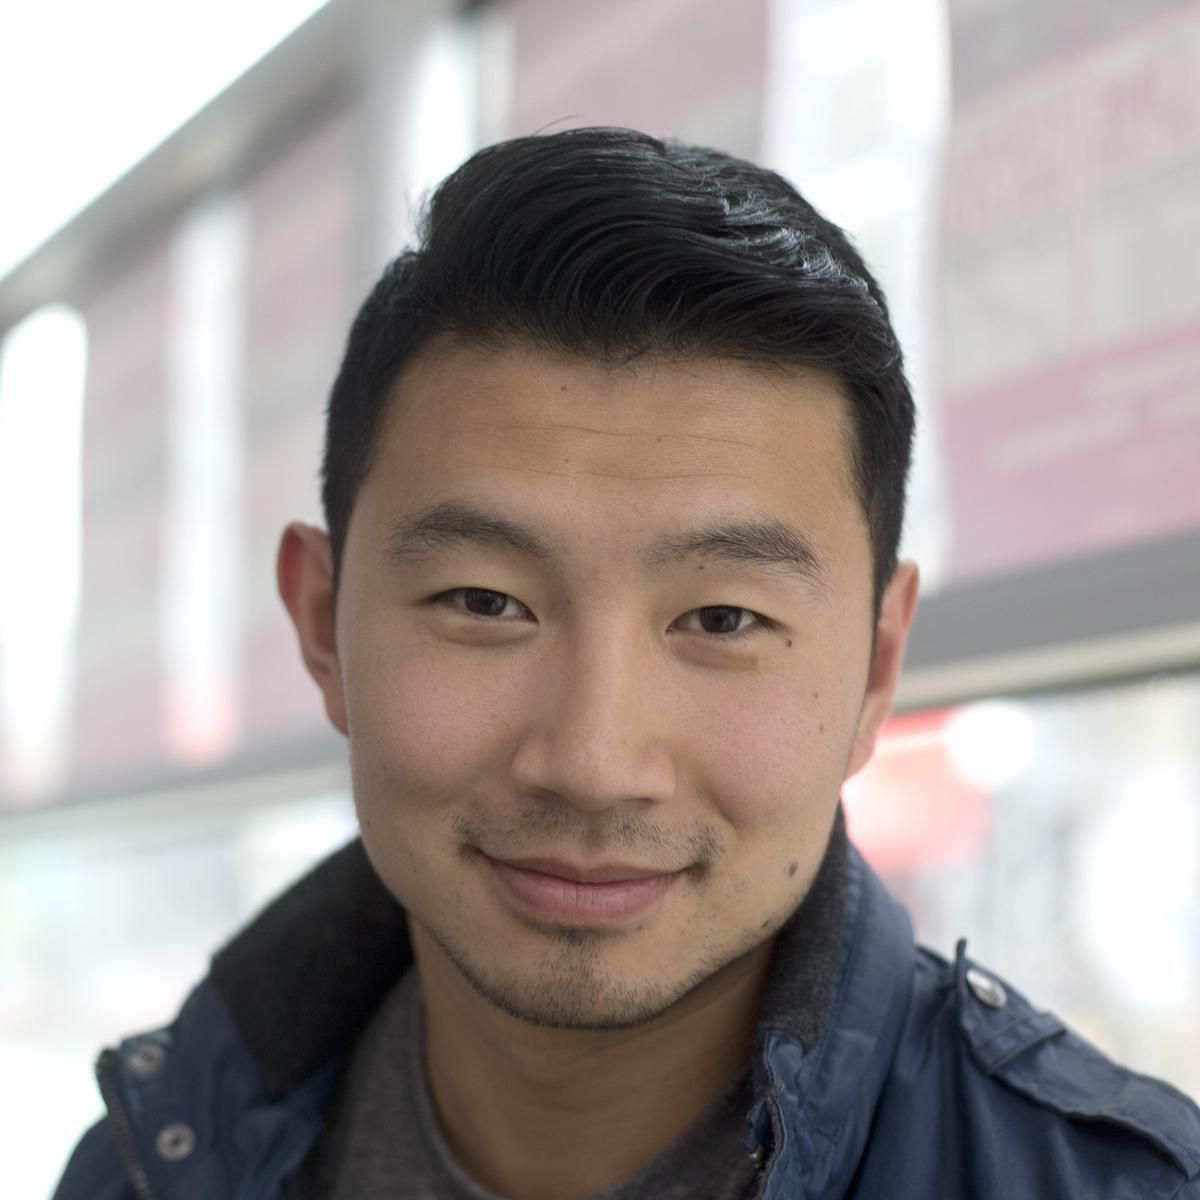

In [8]:
img = PILImage.create(btn_upload.data[-1])
img

In [9]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl


Output()

In [10]:
pred = learn_inf.predict(img)


In [11]:
age = pred[0][0]

In [12]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred[0][0]:.01f}'
lbl_pred


Label(value='Prediction: 34.0')

In [13]:
#hide_output
btn_run = widgets.Button(description='Predict age')
btn_run


Button(description='Classify', style=ButtonStyle())

In [14]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred[0][0]:.01f}'

btn_run.on_click(on_click_classify)


In [15]:
btn_upload = widgets.FileUpload()

In [16]:
VBox([widgets.Label('Upload your face!'), 
      btn_upload, btn_run, out_pl, lbl_pred])